In [6]:
#ReadMe
#acquiring data and labeling data and organizing data
#analyze fundamental characteristics of publicly-traded companies 
#market cap, trailing PE, PB, dividend and etc
#http://theautomatic.net/yahoo_fin-documentation/

In [ ]:
import time
from datetime import datetime
from time import mktime
from sklearn import svm #svm stats explaination
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [ ]:
import time
from datetime import datetime
from time import mktime
from sklearn import svm #svm stats explaination
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns',None)

In [36]:
# Data Manipulation 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#import tensorflow as tf

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns',None)

In [23]:
df = pd.read_pickle("./SP500_0805.pkl")

In [24]:
#columns that can not be covered by value to float function: integer, datetime, or : ratio
exceptionlist = []

i = df.columns.get_loc("Ticker")
exceptionlist.append(i)

i = df.columns.get_loc("Dividend Date 3")
exceptionlist.append(i)

i = df.columns.get_loc("Ex-Dividend Date 4")
exceptionlist.append(i)

i = df.columns.get_loc("Last Split Factor 2")
exceptionlist.append(i)

i = df.columns.get_loc("Last Split Date 3")
exceptionlist.append(i)

i = df.columns.get_loc("Fiscal Year Ends")
exceptionlist.append(i)

i = df.columns.get_loc("Most Recent Quarter (mrq)")
exceptionlist.append(i)

exceptionlist

[0, 25, 26, 27, 28, 29, 30]

In [26]:
#impute SP500 change to all same value
df['S&P500 52-Week Change 3'].fillna(df['S&P500 52-Week Change 3'].mean(), inplace=True)

#generate one column that defines over perform or underperform sp500
df.loc[sp500['52-Week Change 3'] > df['S&P500 52-Week Change 3'], 'Perform_Ind'] = 1
df.loc[sp500['52-Week Change 3'] <= df['S&P500 52-Week Change 3'], 'Perform_Ind'] = 0

In [29]:
#Dropping columns with missing value rate higher than threshold
threshold = 0.7
df = df[df.columns[df.isnull().mean() < threshold]]

# Data Preparation 

In [9]:
pip install yahoo_fin

Note: you may need to restart the kernel to use updated packages.


In [289]:
pip install --upgrade yahoo_fin

  Attempting uninstall: yahoo-fin
    Found existing installation: yahoo-fin 0.8.5
    Uninstalling yahoo-fin-0.8.5:
      Successfully uninstalled yahoo-fin-0.8.5
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install requests_html

  Using cached pyquery-1.4.1-py2.py3-none-any.whl (22 kB)
  Using cached cssselect-1.1.0-py2.py3-none-any.whl (16 kB)
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13489 sha256=eb5c41304c0cfe1dae7b337d7d5e0f8fc80ee97d8a5bea54a8ec77b413a4e11e
  Stored in directory: c:\users\lyouc\appdata\local\pip\cache\wheels\ed\f7\62\50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.15.0-py3-none-any.whl size=23714 sha256=0de2c90dd025a3a648168853a6088bbb63fba789752a86a4c943e2023b8a8e7b
  Stored in directory: c:\users\lyouc\appdata\local\pip\cache\wheels\d7\b3\1d\5c94c64413b2212f64a297c92f11edd45e4474d08d0220a008
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1279 sha256=f480e5f531a74b722e42c16a0ac59b46ce9ef1cfe38b0e393b22f8b8b6eee038
  Stored in directory: c:\users\lyouc\appdata\local\pip\cache\wheels\0a\9e\ba\20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built fake-useragent pa

In [25]:
from yahoo_fin.stock_info import *


In [53]:
#get balance sheet
balance_sheet = get_balance_sheet('amzn')

In [54]:
#get cash flow statement
cash_flow = get_cash_flow('amzn')

In [55]:
#income statement
income_statement = get_income_statement("amzn")

In [85]:
#kep stats, we can get label of outperform and underperform compared to SP500
get_stats('amzn')

,Attribute,Value
0,Beta (5Y Monthly),1.32
1,52-Week Change 3,48.04%
2,S&P500 52-Week Change 3,5.18%
3,52 Week High 3,2955.56
4,52 Week Low 3,1626.03
5,50-Day Moving Average 3,2576.75
6,200-Day Moving Average 3,2161.60
7,Avg Vol (3 month) 3,4.77M
8,Avg Vol (10 day) 3,4.99M
9,Shares Outstanding 5,498.78M


In [56]:
get_data('amzn')

,open,high,low,close,adjclose,volume,ticker
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,AMZN
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,AMZN
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,AMZN
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,AMZN
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,AMZN
...,...,...,...,...,...,...,...
2020-06-26,2775.060059,2782.570068,2688.000000,2692.870117,2692.870117,6500800,AMZN
2020-06-29,2690.010010,2696.800049,2630.080078,2680.379883,2680.379883,4223400,AMZN
2020-06-30,2685.070068,2769.629883,2675.030029,2758.820068,2758.820068,3769700,AMZN
2020-07-01,2757.989990,2895.000000,2754.000000,2878.699951,2878.699951,6363400,AMZN


In [50]:
get_stats_valuation('amzn')

,Unnamed: 0,As of Date: 7/18/2020Current,3/31/2020,12/31/2019,9/30/2019,6/30/2019
0,Market Cap (intraday) 5,1.50T,972.91B,920.22B,859.28B,932.29B
1,Enterprise Value 3,1.51T,981.09B,936.35B,876.28B,951.87B
2,Trailing P/E,143.33,84.73,81.87,72.00,79.03
3,Forward P/E 1,138.89,66.23,58.14,44.84,58.82
4,PEG Ratio (5 yr expected) 1,3.23,1.50,1.32,1.02,1.32
5,Price/Sales (ttm),5.11,3.50,3.50,3.46,3.93
6,Price/Book (mrq),22.92,15.68,16.28,16.19,19.32
7,Enterprise Value/Revenue 3,5.10,13.00,10.71,12.52,15.01
8,Enterprise Value/EBITDA 6,40.95,107.26,87.69,102.00,112.33


In [ ]:
get_analysts_info("amzn")
holders = get_holders("amzn")

In [170]:
get_holders("amzn")

{'Major Holders':    15.12%        % of Shares Held by All Insider
 0  57.69%       % of Shares Held by Institutions
 1  67.97%        % of Float Held by Institutions
 2    4038  Number of Institutions Holding Shares,
 'Direct Holders (Forms 3 and 4)':                             Holder    Shares Date Reported  % Out        Value
 0              Advisor Group, Inc.  35429155  Mar 30, 2020  7.10%  69076932086
 1       Vanguard Group, Inc. (The)  32975915  Mar 30, 2020  6.61%  64293800993
 2                   Blackrock Inc.  27023092  Mar 30, 2020  5.42%  52687462934
 3         State Street Corporation  16267474  Mar 30, 2020  3.26%  31717019407
 4                         FMR, LLC  15839627  Mar 30, 2020  3.18%  30882837554
 5    Price (T.Rowe) Associates Inc  15605864  Mar 30, 2020  3.13%  30427065158
 6    Geode Capital Management, LLC   6048684  Mar 30, 2020  1.21%  11793240168
 7       Northern Trust Corporation   4847522  Mar 30, 2020  0.97%   9451310593
 8                   Morgan 

In [43]:
#Understand the package source code
#get_income_statement??

In [26]:
#get sp500 list
tickers = tickers_sp500()
# get list of Dow stocks
dow_list = tickers_dow()
 
# get list of NASDAQ stocks
nasdaq_list = tickers_nasdaq()



In [59]:
#create a combined stocks list by combining nasdaq stocks + sp500
in_tickers = set(tickers) #in sp500
in_nasdaq = set(nasdaq_list) #in nasdaq

in_sp_but_not_in_nasdaq = in_tickers - in_nasdaq #

In [70]:
ticker_list_combined = sorted(nasdaq_list + list(in_sp_but_not_in_nasdaq))

In [90]:
get_stats_valuation('amzn')

,Unnamed: 0,As of Date: 5/11/2020Current,3/31/2020,12/31/2019,9/30/2019,6/30/2019
0,Market Cap (intraday) 5,1.19T,972.91B,920.22B,859.28B,932.29B
1,Enterprise Value 3,1.20T,981.09B,936.35B,876.28B,951.87B
2,Trailing P/E,113.69,84.73,81.87,72.00,79.03
3,Forward P/E 1,96.15,66.23,58.14,44.84,58.82
4,PEG Ratio (5 yr expected) 1,2.21,1.50,1.32,1.02,1.32
5,Price/Sales (ttm),4.06,3.50,3.50,3.46,3.93
6,Price/Book (mrq),18.18,15.68,16.28,16.19,19.32
7,Enterprise Value/Revenue 3,4.05,13.00,10.71,12.52,15.01
8,Enterprise Value/EBITDA 6,32.56,107.26,87.69,102.00,112.33


In [ ]:
#Efficient method to scrape balance sheets, cash flow statements, and income statements in a single call from Yahoo Finance’s financials page for a given ticker 
# get only yearly data
get_financials('nflx', yearly = True, quarterly = False)
#Scrapes the top 100 most active stocks (on the given trading day) from Yahoo Finance
get_day_most_active()
# dividends from 2010 onward
get_dividends("msft", "01-01-2010")
#Scrapes earnings information from Yahoo Finance’s financials page for a given ticke
get_earnings('nflx')

In [29]:
#combine get stats returned stats for the tickers list to one dataset function
def combine_df(tickers):
    dfObj = pd.DataFrame()
    for i in tickers:
        try:
            stats = get_stats(i)
            stats.set_index('Attribute',inplace=True)
            stats_T = stats.transpose()
            stats_T.insert(0, "Ticker", i, True) 
            dfObj = dfObj.append(stats_T)
            print(i)
        except:
            pass
    return dfObj    

In [31]:
#run the create combined dataset function
df = combine_df(tickers)

A
AAL
AAP
AAPL
ABBV
ABC
ABMD
ABT
ACN
ADBE
ADI
ADM
ADP
ADSK
AEE
AEP
AES
AFL
AIG
AIV
AIZ
AJG
AKAM
ALB
ALGN
ALK
ALL
ALLE
ALXN
AMAT
AMCR
AMD
AME
AMGN
AMP
AMT
AMZN
ANET
ANSS
ANTM
AON
AOS
APA
APD
APH
APTV
ARE
ATO
ATVI
AVB
AVGO
AVY
AWK
AXP
AZO
BA
BAC
BAX
BBY
BDX
BEN
BF.B
BIIB
BIO
BK
BKNG
BKR
BLK
BLL
BMY
BR
BSX
BWA
BXP
C
CAG
CAH
CARR
CAT
CB
CBOE
CBRE
CCI
CCL
CDNS
CDW
CE
CERN
CF
CFG
CHD
CHRW
CHTR
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COG
COO
COP
COST
COTY
CPB
CPRT
CRM
CSCO
CSX
CTAS
CTL
CTSH
CTVA
CTXS
CVS
CVX
CXO
D
DAL
DD
DE
DFS
DG
DGX
DHI
DHR
DIS
DISCA
DISCK
DISH
DLR
DLTR
DOV
DOW
DPZ
DRE
DRI
DTE
DUK
DVA
DVN
DXC
DXCM
EA
EBAY
ECL
ED
EFX
EIX
EL
EMN
EMR
EOG
EQIX
EQR
ES
ESS
ETFC
ETN
ETR
EVRG
EW
EXC
EXPD
EXPE
EXR
F
FANG
FAST
FB
FBHS
FCX
FDX
FE
FFIV
FIS
FISV
FITB
FLIR
FLS
FLT
FMC
FOX
FOXA
FRC
FRT
FTI
FTNT
FTV
GD
GE
GILD
GIS
GL
GLW
GM
GOOG
GOOGL
GPC
GPN
GPS
GRMN
GS
GWW
HAL
HAS
HBAN
HBI
HCA
HD
HES
HFC
HIG
HII
HLT
HOLX
HON
HPE
HPQ
HRB
HRL
HSIC
HST
HSY
HUM
HWM
IBM
ICE
IDXX
IEX
IFF
ILMN
INCY

In [32]:
df

,Ticker,Beta (5Y Monthly),52-Week Change 3,S&P500 52-Week Change 3,52 Week High 3,52 Week Low 3,50-Day Moving Average 3,200-Day Moving Average 3,Avg Vol (3 month) 3,Avg Vol (10 day) 3,...,"Shares Short (Aug 30, 2018) 4","Short Ratio (Aug 30, 2018) 4","Short % of Float (Aug 30, 2018) 4","Short % of Shares Outstanding (Aug 30, 2018) 4","Shares Short (prior month Jul 30, 2018) 4",Shares Short 4,Short Ratio 4,Short % of Float 4,Short % of Shares Outstanding 4,Shares Short (prior month ) 4
Value,A,1.12,46.45%,14.33%,99.36,61.13,91.34,82.71,1.84M,1.48M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,AAL,1.73,-60.93%,14.33%,31.67,8.25,12.82,15.65,94.68M,54.11M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,AAP,1.32,4.74%,14.33%,171.43,71.33,144.01,128.93,946.98k,917.88k,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,AAPL,1.18,121.19%,14.33%,446.55,193.82,374.98,315.59,35.69M,48.16M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,ABBV,0.82,48.12%,14.33%,101.28,62.55,97.46,88.34,9.32M,7.4M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Value,YUM,0.87,-20.99%,NaN,119.59,54.95,89.45,88.45,2.43M,2.45M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,ZBH,1.31,0.42%,14.33%,161.11,74.37,126.55,125.30,1.49M,1.19M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,ZBRA,1.66,40.59%,NaN,287.83,150.06,264.41,234.22,340.87k,355.57k,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,ZION,1.70,-21.20%,NaN,52.48,23.58,33.42,34.57,2.41M,1.48M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df.to_csv ('.nasdaq_sp500.csv', index = False, header=True)

In [31]:
#in case need to delete the data
#import os
#os.remove("./dummy.pkl")

In [4]:
df = pd.read_pickle("./SP500.pkl")

In [5]:
#columns that can not be covered by value to float function: integer, datetime, or : ratio
exceptionlist = []

i = df.columns.get_loc("Ticker")
exceptionlist.append(i)

i = df.columns.get_loc("Dividend Date 3")
exceptionlist.append(i)

i = df.columns.get_loc("Ex-Dividend Date 4")
exceptionlist.append(i)

i = df.columns.get_loc("Last Split Factor 2")
exceptionlist.append(i)

i = df.columns.get_loc("Last Split Date 3")
exceptionlist.append(i)

i = df.columns.get_loc("Fiscal Year Ends")
exceptionlist.append(i)

i = df.columns.get_loc("Most Recent Quarter (mrq)")
exceptionlist.append(i)

exceptionlist

[0, 25, 26, 27, 28, 29, 30]

In [11]:
#create a list for all other column index
formatlist = [i for i in range(len(df.columns)) if i not in exceptionlist]

In [36]:
#format datetime from object to datetime
for i in [25,26,28,29,30]:
    df.iloc[:,i] = pd.to_datetime(df.iloc[:,i])

In [37]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if 'T' in x:
        return float(x.replace('T', '')) * 1000000000000
    if '$' in x:
        return float(x.replace('$',''))
    if '%' in x:
        try: 
            return float(x.replace('%','').replace(',',''))/100
        except :
            return 0
    if ',' in x:
        return float(x.replace(',',''))
    
    return float(x) 
    

In [38]:
#format all other columns
for i in formatlist:
        df.iloc[:, i] = df.iloc[:, i].apply(value_to_float)

        

In [42]:
df['Import_Date'] = pd.to_datetime('today').strftime('%m/%d/%Y')

In [44]:
#save the dataset to pickle
df.to_pickle("./SP500_0805.pkl")
#df.to_pickle("./Nasdaq.pkl")

In [47]:
sp500 = pd.read_pickle("./SP500_0805.pkl")

In [160]:
nadaq = pd.read_pickle("./Nasdaq.pkl")

In [48]:
########## side code#################
#play with date formatting
import datetime
from datetime import datetime
from time import mktime
from datetime import timedelta
from datetime import date

In [121]:
#get current time
now = datetime.datetime.now()
today = datetime.date.today()

In [126]:
#https://www.tutorialspoint.com/python/time_strptime.htm
struct_time  = datetime.date(datetime.fromtimestamp(mktime(time.strptime('Nov 02, 2014','%b %d, %Y'))))

#dt = datetime.fromtimestamp(mktime(struct_time))
#datetime.date(dt)
#gap = datetime.timedelta(weeks=1,days = 1)
#date2 = dt + gap
#convert back to string type
#date2_f = date2.strftime("%d/%m/%Y")
#type(date2_f)

# Further Data Preprocessing by Adding sector

In [165]:
sp500 = pd.read_pickle("./SP500.pkl")
#nadaq = pd.read_pickle("./Nasdaq.pkl")

In [167]:
sp500.head(100)

,Ticker,Beta (5Y Monthly),52-Week Change 3,S&P500 52-Week Change 3,52 Week High 3,52 Week Low 3,50-Day Moving Average 3,200-Day Moving Average 3,Avg Vol (3 month) 3,Avg Vol (10 day) 3,Shares Outstanding 5,Float,% Held by Insiders 1,% Held by Institutions 1,"Shares Short (Jun 29, 2020) 4","Short Ratio (Jun 29, 2020) 4","Short % of Float (Jun 29, 2020) 4","Short % of Shares Outstanding (Jun 29, 2020) 4","Shares Short (prior month May 28, 2020) 4",Forward Annual Dividend Rate 4,Forward Annual Dividend Yield 4,Trailing Annual Dividend Rate 3,Trailing Annual Dividend Yield 3,5 Year Average Dividend Yield 4,Payout Ratio 4,Dividend Date 3,Ex-Dividend Date 4,Last Split Factor 2,Last Split Date 3,Fiscal Year Ends,Most Recent Quarter (mrq),Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Return on Equity (ttm),Revenue (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Gross Profit (ttm),EBITDA,Net Income Avi to Common (ttm),Diluted EPS (ttm),Quarterly Earnings Growth (yoy),Total Cash (mrq),Total Cash Per Share (mrq),Total Debt (mrq),Total Debt/Equity (mrq),Current Ratio (mrq),Book Value Per Share (mrq),Operating Cash Flow (ttm),Levered Free Cash Flow (ttm),Previous Close,YTD Return,Expense Ratio (net),Category,Last Cap Gain,Morningstar Rating,Morningstar Risk Rating,Sustainability Rating,Net Assets,Yield,5y Average Return,Holdings Turnover,Last Dividend,Average for Category,Inception Date,"Shares Short (Aug 30, 2018) 4","Short Ratio (Aug 30, 2018) 4","Short % of Float (Aug 30, 2018) 4","Short % of Shares Outstanding (Aug 30, 2018) 4","Shares Short (prior month Jul 30, 2018) 4",Shares Short 4,Short Ratio 4,Short % of Float 4,Short % of Shares Outstanding 4,Shares Short (prior month ) 4
Value,A,1.12,0.37,0.08,94.51,61.13,89.09,81.96,1930000.00,1590000.00,308780000.00,307630000.00,0.00,0.89,3880000.00,2.28,0.01,0.01,5140000.00,0.72,0.01,0.69,0.01,0.90,0.31,2020-07-21,2020-06-28,1398:1000,2014-11-02,2019-10-30,2020-04-29,0.13,0.19,0.07,0.14,5240000000.00,16.89,0.00,2810000000.00,1290000000.00,683000000.00,2.18,-0.45,1320000000.00,4.29,2680000000.00,56.15,1.63,15.46,810000000.00,684630000.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Value,AAL,1.73,-0.64,0.08,34.99,8.25,14.01,17.04,98260000.00,81840000.00,508110000.00,417740000.00,0.01,0.85,143690000.00,1.02,0.41,0.28,126980000.00,0.40,0.03,0.40,0.03,1.21,nan,2020-02-18,2020-02-03,0:1,2013-12-08,2019-12-30,2020-03-30,-0.02,0.05,0.02,nan,43700000000.00,100.04,-0.20,12560000000.00,4510000000.00,-740000000.00,-1.70,nan,3580000000.00,8.46,34070000000.00,nan,0.37,-6.23,2000000000.00,-870370000.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Value,AAP,1.32,-0.09,0.08,171.43,71.33,141.58,129.51,952870.00,861600.00,69100000.00,68610000.00,0.00,1.04,2430000.00,2.66,0.04,0.04,1960000.00,1.00,0.01,0.43,0.00,0.18,0.08,2020-07-02,2020-06-10,3:2,2005-09-25,2019-12-27,2020-04-17,0.04,0.07,0.03,0.11,9450000000.00,134.65,-0.09,4260000000.00,877580000.00,387980000.00,5.50,-0.69,1280000000.00,18.59,4180000000.00,118.24,1.36,51.39,673280000.00,154060000.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Value,AAPL,1.18,0.86,0.08,399.82,192.58,356.60,308.80,34860000.00,32860000.00,4330000000.00,4330000000.00,0.00,0.62,33960000.00,0.92,0.01,0.01,34190000.00,3.28,0.01,3.08,0.01,1.57,0.24,2020-05-13,2020-05-07,7:1,2014-06-08,2019-09-27,2020-03-27,0.21,0.24,0.12,0.62,267980000000.00,60.10,0.01,98390000000.00,77310000000.00,57220000000.00,12.73,-0.03,94050000000.00,21.70,118760000000.00,151.43,1.50,18.14,75370000000.00,45040000000.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Value,ABBV,0.82,0.48,0.08,101.28,62.55,96.24,87.72,9820000.00,6280000.00,1760000000.00,1470000000.00,0.00,0.77,16210000.00,1.90,0.01,0.01,19200000.00,4.72,0.05,4.50,0.04,3.96,0.78,2020-08-13,2020-07-13,NaN,N

In [179]:
pip install datapackage

  Created wheel for linear-tsv: filename=linear_tsv-1.1.0-py3-none-any.whl size=7389 sha256=7d908f9614b0e31b1a97e1e9b70fa790c92fe2e461894bca6522deb8fc0e6e27
  Stored in directory: c:\users\lyouc\appdata\local\pip\cache\wheels\dd\0a\62\49ee84fab92057fb3e303fb1a59e75ccac6899b417f441305a
Successfully built linear-tsv
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16
Note: you may need to restart the kernel to use updated packages.


In [54]:
#https://datahub.io/core/s-and-p-500-companies#pandas 
#import full name and sector for sp500
import datapackage
import pandas as pd

data_url = 'https://datahub.io/core/s-and-p-500-companies/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)

    Symbol                    Name                  Sector
0      MMM              3M Company             Industrials
1      AOS         A.O. Smith Corp             Industrials
2      ABT     Abbott Laboratories             Health Care
3     ABBV             AbbVie Inc.             Health Care
4     ABMD             ABIOMED Inc             Health Care
..     ...                     ...                     ...
500    YUM         Yum! Brands Inc  Consumer Discretionary
501   ZBRA      Zebra Technologies  Information Technology
502    ZBH  Zimmer Biomet Holdings             Health Care
503   ZION           Zions Bancorp              Financials
504    ZTS                  Zoetis             Health Care

[505 rows x 3 columns]
    Symbol                    Name                  Sector
0      MMM              3M Company             Industrials
1      AOS         A.O. Smith Corp             Industrials
2      ABT     Abbott Laboratories             Health Care
3     ABBV             AbbVie In

In [188]:
#inspect.getsourcelines(datapackage.Package)

In [55]:
data

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ABMD,ABIOMED Inc,Health Care
...,...,...,...
500,YUM,Yum! Brands Inc,Consumer Discretionary
501,ZBRA,Zebra Technologies,Information Technology
502,ZBH,Zimmer Biomet Holdings,Health Care
503,ZION,Zions Bancorp,Financials


In [ ]:
#merge sp500 and data table of sector name to one dataset

In [56]:
display('sp500','data')
sp500_new  = pd.merge(sp500, data, how='left', left_on='Ticker', right_on='Symbol').drop('Symbol',1)

'sp500'

'data'

In [189]:
#import inspect

#nspect.getsourcelines(get_data)

In [57]:
sp500_new.to_pickle("./SP500_0805.pkl")

In [58]:
sp500 = pd.read_pickle("./SP500_0805.pkl")

In [59]:
sp500.head(2)

,Ticker,Beta (5Y Monthly),52-Week Change 3,S&P500 52-Week Change 3,52 Week High 3,52 Week Low 3,50-Day Moving Average 3,200-Day Moving Average 3,Avg Vol (3 month) 3,Avg Vol (10 day) 3,Shares Outstanding 5,Float,% Held by Insiders 1,% Held by Institutions 1,"Shares Short (Jul 14, 2020) 4","Short Ratio (Jul 14, 2020) 4","Short % of Float (Jul 14, 2020) 4","Short % of Shares Outstanding (Jul 14, 2020) 4","Shares Short (prior month Jun 14, 2020) 4",Forward Annual Dividend Rate 4,Forward Annual Dividend Yield 4,Trailing Annual Dividend Rate 3,Trailing Annual Dividend Yield 3,5 Year Average Dividend Yield 4,Payout Ratio 4,Dividend Date 3,Ex-Dividend Date 4,Last Split Factor 2,Last Split Date 3,Fiscal Year Ends,Most Recent Quarter (mrq),Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Return on Equity (ttm),Revenue (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Gross Profit (ttm),EBITDA,Net Income Avi to Common (ttm),Diluted EPS (ttm),Quarterly Earnings Growth (yoy),Total Cash (mrq),Total Cash Per Share (mrq),Total Debt (mrq),Total Debt/Equity (mrq),Current Ratio (mrq),Book Value Per Share (mrq),Operating Cash Flow (ttm),Levered Free Cash Flow (ttm),Previous Close,YTD Return,Expense Ratio (net),Category,Last Cap Gain,Morningstar Rating,Morningstar Risk Rating,Sustainability Rating,Net Assets,Yield,5y Average Return,Holdings Turnover,Last Dividend,Average for Category,Inception Date,"Shares Short (Aug 30, 2018) 4","Short Ratio (Aug 30, 2018) 4","Short % of Float (Aug 30, 2018) 4","Short % of Shares Outstanding (Aug 30, 2018) 4","Shares Short (prior month Jul 30, 2018) 4",Shares Short 4,Short Ratio 4,Short % of Float 4,Short % of Shares Outstanding 4,Shares Short (prior month ) 4,Import_Date,Name,Sector
0,A,1.12,0.46,0.14,99.36,61.13,91.34,82.71,1840000.00,1480000.00,308780000.00,307630000.00,0.00,0.89,4120000.00,2.90,0.01,0.01,4390000.00,0.72,0.01,0.69,0.01,0.90,0.31,2020-07-21,2020-06-28,1398:1000,2014-11-02,2019-10-30,2020-04-29,0.13,0.19,0.07,0.14,5240000000.00,16.89,0.00,2810000000.00,1290000000.00,683000000.00,2.18,-0.45,1320000000.00,4.29,2680000000.00,56.15,1.63,15.46,810000000.00,684630000.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,08/05/2020,Agilent Technologies Inc,Health Care
1,AAL,1.73,-0.61,0.14,31.67,8.25,12.82,15.65,94680000.00,54110000.00,508110000.00,502370000.00,0.01,0.85,150200000.00,1.49,0.43,0.30,129260000.00,0.40,0.04,0.30,0.03,1.24,nan,2020-02-18,2020-02-03,0:1,2013-12-08,2019-12-30,2020-06-29,-0.10,-0.10,-0.03,nan,33360000000.00,77.09,-0.86,12560000000.00,-853000000.00,-3470000000.00,-8.02,nan,9810000000.00,19.30,40050000000.00,nan,0.77,-6.23,352000000.00,-4270000000.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,08/05/2020,American Airlines Group,Industrials


In [ ]:
#Questions want to answer
1. which top 10 stocks that outperform the sp500 the most 
2. current price and 52 weeks high difference/current price
3. 50 day moving avg < 200 moving avg
4. sector industry correlation
5. cluster the companies purely on its own
6. feature importance


# Data Analysis

In [ ]:
Dimension reduction
1)Drop columns with high missing value
2)drop variables that are highly correlated
3)feature interaction
4)use step wise selectin/lasso/treebased feature importance for feature selection

Scaling is not mandatory for many algorithms, but it might be still nice to apply. However, the algorithms based on distance calculations such as k-NN or k-Means need to have scaled continuous features as model input.

# Package Import 

In [10]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=3ac162a98d2ef13b25232a667f7f0498f46d449956633d69c71c88ac68213273
  Stored in directory: c:\users\lyouc\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for absl-py: filename=absl_py-0.9.0-py3-none-any.whl size=121935 sha256=ecc07b6de8f1850bfa23bfd80a7c2635af6caf8892353704a4a9f484b416a1b4
  Stored in directory: c:\users\lyouc\appdata\local\pip\cache\wheels\cc\af\1a\498a24d0730ef484019e007bb9e8cef3ac00311a672c049a3e
Successfully built termcolor absl-py
Note: you may need to restart the kernel to use updated packages.


In [12]:
#standard python libraties
import io, os, sys, types, time, datetime, math, random, requests, subprocess, tempfile

In [2]:
# Data Manipulation 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#import tensorflow as tf

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

In [3]:
import tensorflow as tf

ImportError: Traceback (most recent call last):
  File "C:\Users\lyouc\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

# Data Exploration

Univariate

In [51]:
# Describing all the Numerical Features
sp500.describe()

,Beta (5Y Monthly),52-Week Change 3,S&P500 52-Week Change 3,52 Week High 3,52 Week Low 3,50-Day Moving Average 3,200-Day Moving Average 3,Avg Vol (3 month) 3,Avg Vol (10 day) 3,Shares Outstanding 5,Float,% Held by Insiders 1,% Held by Institutions 1,"Shares Short (Jul 14, 2020) 4","Short Ratio (Jul 14, 2020) 4","Short % of Float (Jul 14, 2020) 4","Short % of Shares Outstanding (Jul 14, 2020) 4","Shares Short (prior month Jun 14, 2020) 4",Forward Annual Dividend Rate 4,Forward Annual Dividend Yield 4,Trailing Annual Dividend Rate 3,Trailing Annual Dividend Yield 3,5 Year Average Dividend Yield 4,Payout Ratio 4,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Return on Equity (ttm),Revenue (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Gross Profit (ttm),EBITDA,Net Income Avi to Common (ttm),Diluted EPS (ttm),Quarterly Earnings Growth (yoy),Total Cash (mrq),Total Cash Per Share (mrq),Total Debt (mrq),Total Debt/Equity (mrq),Current Ratio (mrq),Book Value Per Share (mrq),Operating Cash Flow (ttm),Levered Free Cash Flow (ttm),Previous Close,YTD Return,Expense Ratio (net),Category,Last Cap Gain,Morningstar Rating,Morningstar Risk Rating,Sustainability Rating,Net Assets,Yield,5y Average Return,Holdings Turnover,Last Dividend,Average for Category,Inception Date,"Shares Short (Aug 30, 2018) 4","Short Ratio (Aug 30, 2018) 4","Short % of Float (Aug 30, 2018) 4","Short % of Shares Outstanding (Aug 30, 2018) 4","Shares Short (prior month Jul 30, 2018) 4",Shares Short 4,Short Ratio 4,Short % of Float 4,Short % of Shares Outstanding 4,Shares Short (prior month ) 4
count,475.00,497.00,490.00,500.00,500.00,500.00,500.00,500.00,500.00,497.00,497.00,496.00,496.00,496.00,496.00,493.00,496.00,496.00,380.00,380.00,406.00,406.00,382.00,452.00,497.00,497.00,472.00,453.00,497.00,497.00,496.00,500.00,466.00,497.00,486.00,381.00,493.00,493.00,491.00,448.00,453.00,486.00,441.00,426.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
mean,1.11,0.04,0.14,173.75,87.45,140.45,132.49,5821724.06,4960138.10,585836659.96,567268048.29,0.04,0.86,11921819.01,2.94,0.04,0.03,12245803.12,2.18,0.03,2.11,0.03,2.41,0.78,0.11,0.17,0.05,1.41,23781503661.97,61.58,-0.06,9323318920.00,4383748240.34,1875012072.43,4.88,0.17,15609493328.60,20.48,20057098207.74,295.21,1.88,33.36,4114709274.38,2239338732.39,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2550000.00,2.87,0.03,0.02,2580000.00,nan,nan,nan,nan,nan
std,0.52,0.36,0.00,312.27,154.44,258.25,233.83,11193828.63,9735862.66,991885138.58,975285796.61,0.09,0.14,17223995.37,2.04,0.05,0.03,17091245.48,1.78,0.02,1.72,0.02,1.31,2.25,0.24,0.19,0.05,24.36,45581681200.05,129.62,0.27,16689883199.43,7966492325.61,5213126174.49,12.68,2.00,92730582786.43,82.89,55457751628.35,2116.63,1.78,48.90,8735953903.71,5292041410.50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,-0.07,-0.72,0.14,9.65,2.73,4.30,6.29,27680.00,22380.00,3690000.00,3590000.00,0.00,0.04,34310.00,0.21,0.00,0.00,37610.00,0.01,0.00,0.04,0.00,0.02,0.00,-2.73,-2.53,-0.29,-1.87,615140000.00,2.59,-0.97,353480000.00,-1030000000.00,-21860000000.00,-48.86,-0.99,841000.00,0.00,12220000.00,0.78,0.08,-83.43,-14230000000.00,-12500000000.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2550000.00,2.87,0.03,0.02,2580000.00,nan,nan,nan,nan,nan
25%,0.79,-0.21,0.14,58.80,25.70,40.37,41.11,1277500.00,1080000.00,147410000.00,143050000.00,0.00,0.78,3150000.00,1.68,0.01,0.01,3507500.00,0.96,0.01,0.93,0.01,1.46,0.15,0.05,0.10,0.03,0.07,4850000000.00,17.98,-0.17,2222500000.00,1030000000.00,365900000.00,1.62,-0.37,683110000.00,2.60,3300000000.00,51.38,1.02,11.38,847000000.00,395565000.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2550000.00,2.87,0.03,0.02,2580000.00,nan,nan,nan,nan,nan
50%,1.06,0.02,0.14,104.92,54.89,82.47,82.12,2420000.00,2115000.00,295070000.00,284320000.00,0.01,0.87,6440000.00,2.3

In [ ]:
sp500

In [5]:
# Describing all the Categorical Features
sp500.describe(include=['O'])


,Ticker,Last Split Factor 2,Name
count,502,394,502
unique,502,90,502
top,ARE,2:1,Delta Air Lines Inc.
freq,1,220,1


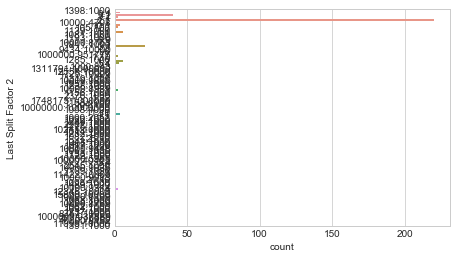

In [19]:
#categorical variable
sns.countplot(y='Last Split Factor 2' , data=sp500)


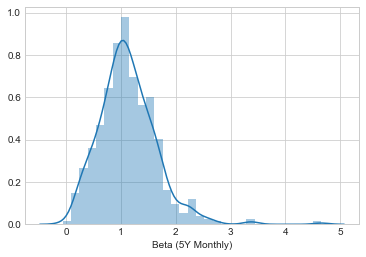

In [18]:
#continuous variable
sns.distplot(sp500['Beta (5Y Monthly)'])

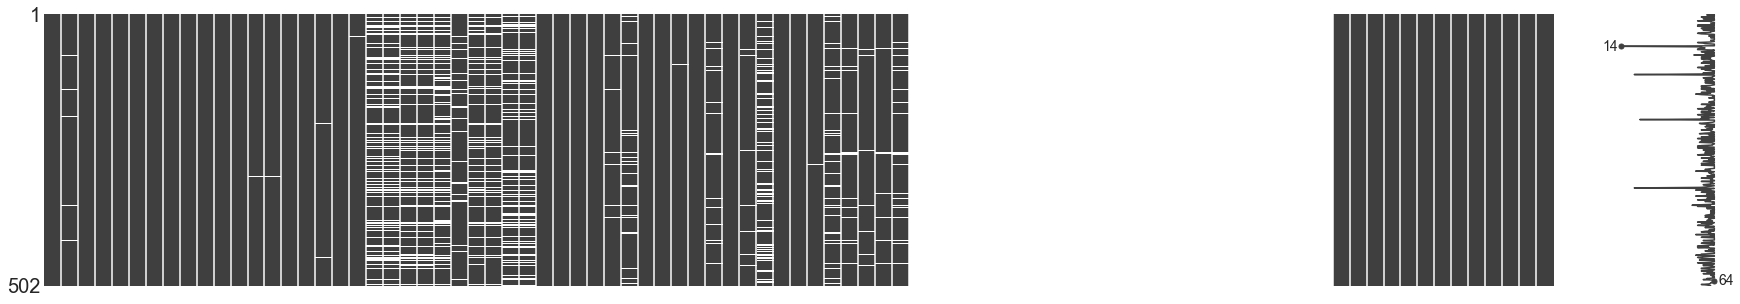

In [21]:

# How many missing values are there in our dataset?
missingno.matrix(sp500, figsize = (30,5))

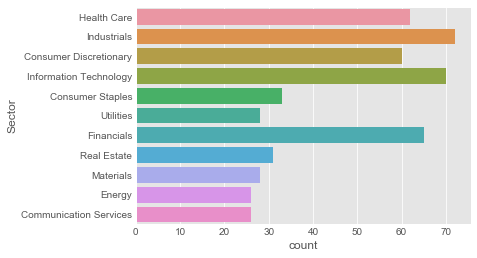

In [61]:
sns.countplot(y='Sector' , data=sp500)


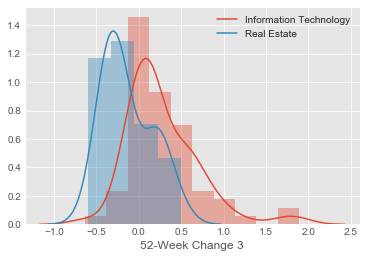

In [68]:
sns.distplot(sp500.loc[sp500['Sector'] == 'Information Technology']['52-Week Change 3'], kde_kws={"label": "Information Technology"});
#sns.distplot(sp500.loc[sp500['Sector'] == 'Industrials']['52-Week Change 3'], kde_kws={"label": "Industrials"});
#sns.distplot(sp500.loc[sp500['Sector'] == 'Health Care']['52-Week Change 3'], kde_kws={"label": "Health Care"});
sns.distplot(sp500.loc[sp500['Sector'] == 'Real Estate']['52-Week Change 3'], kde_kws={"label": "Real Estate"});

# Feature Cleaning, Engineering, Imputation

Cleaning
Missing Value
Special Value like NA, NaN 
Outlier

Engineering
dataset bin - where continuous variables are discretised
feature crossing: create new features as a combination of existing features

Imputation of missing value
one hot impute


In [53]:
sp500.columns.tolist()

['Ticker',
 'Beta (5Y Monthly)',
 '52-Week Change 3',
 'S&P500 52-Week Change 3',
 '52 Week High 3',
 '52 Week Low 3',
 '50-Day Moving Average 3',
 '200-Day Moving Average 3',
 'Avg Vol (3 month) 3',
 'Avg Vol (10 day) 3',
 'Shares Outstanding 5',
 'Float',
 '% Held by Insiders 1',
 '% Held by Institutions 1',
 'Shares Short (Jul 14, 2020) 4',
 'Short Ratio (Jul 14, 2020) 4',
 'Short % of Float (Jul 14, 2020) 4',
 'Short % of Shares Outstanding (Jul 14, 2020) 4',
 'Shares Short (prior month Jun 14, 2020) 4',
 'Forward Annual Dividend Rate 4',
 'Forward Annual Dividend Yield 4',
 'Trailing Annual Dividend Rate 3',
 'Trailing Annual Dividend Yield 3',
 '5 Year Average Dividend Yield 4',
 'Payout Ratio 4',
 'Dividend Date 3',
 'Ex-Dividend Date 4',
 'Last Split Factor 2',
 'Last Split Date 3',
 'Fiscal Year Ends',
 'Most Recent Quarter (mrq)',
 'Profit Margin',
 'Operating Margin (ttm)',
 'Return on Assets (ttm)',
 'Return on Equity (ttm)',
 'Revenue (ttm)',
 'Revenue Per Share (ttm)',
 '

Feature Correlation

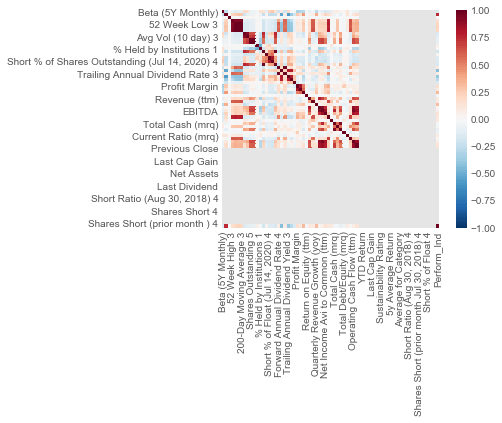

In [80]:
sns.heatmap(sp500.corr(),
           vmin=-1,vmax=1,
           square=True,
           cmap=sns.color_palette("RdBu_r",100))

# Feature Importance

In [41]:
#The process of converting Categorical Features into values is called Encoding. Let's perform both One-Hot and Label encoding.
df = pd.get_dummies(df, columns=["Sector"], prefix=["Sector_is"] )


KeyError: "None of [Index(['Sector'], dtype='object')] are in the [columns]"

In [42]:
exceptionlist
#create a list for all other column index
formatlist = [i for i in range(len(df.columns)) if i not in exceptionlist]

In [44]:
df_model_input = df.iloc[:,formatlist]

In [49]:

df_model_input.fillna(0, inplace=True)

In [50]:
df_model_input

,Beta (5Y Monthly),52-Week Change 3,S&P500 52-Week Change 3,52 Week High 3,52 Week Low 3,50-Day Moving Average 3,200-Day Moving Average 3,Avg Vol (3 month) 3,Avg Vol (10 day) 3,Shares Outstanding 5,Float,% Held by Insiders 1,% Held by Institutions 1,"Shares Short (Jul 14, 2020) 4","Short Ratio (Jul 14, 2020) 4","Short % of Float (Jul 14, 2020) 4","Short % of Shares Outstanding (Jul 14, 2020) 4","Shares Short (prior month Jun 14, 2020) 4",Forward Annual Dividend Rate 4,Forward Annual Dividend Yield 4,Trailing Annual Dividend Rate 3,Trailing Annual Dividend Yield 3,5 Year Average Dividend Yield 4,Payout Ratio 4,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Return on Equity (ttm),Revenue (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Gross Profit (ttm),EBITDA,Net Income Avi to Common (ttm),Diluted EPS (ttm),Quarterly Earnings Growth (yoy),Total Cash (mrq),Total Cash Per Share (mrq),Total Debt (mrq),Total Debt/Equity (mrq),Current Ratio (mrq),Book Value Per Share (mrq),Operating Cash Flow (ttm),Levered Free Cash Flow (ttm),Import_Date,Name,Perform_Ind,Sector_is_Communication Services,Sector_is_Consumer Discretionary,Sector_is_Consumer Staples,Sector_is_Energy,Sector_is_Financials,Sector_is_Health Care,Sector_is_Industrials,Sector_is_Information Technology,Sector_is_Materials,Sector_is_Real Estate,Sector_is_Utilities
0,1.12,0.46,0.14,99.36,61.13,91.34,82.71,1840000.00,1480000.00,308780000.00,307630000.00,0.00,0.89,4120000.00,2.90,0.01,0.01,4390000.00,0.72,0.01,0.69,0.01,0.90,0.31,0.13,0.19,0.07,0.14,5240000000.00,16.89,0.00,2810000000.00,1290000000.00,683000000.00,2.18,-0.45,1320000000.00,4.29,2680000000.00,56.15,1.63,15.46,810000000.00,684630000.00,08/05/2020,Agilent Technologies Inc,1.00,0,0,0,0,0,1,0,0,0,0,0
1,1.73,-0.61,0.14,31.67,8.25,12.82,15.65,94680000.00,54110000.00,508110000.00,502370000.00,0.01,0.85,150200000.00,1.49,0.43,0.30,129260000.00,0.40,0.04,0.30,0.03,1.24,0.00,-0.10,-0.10,-0.03,0.00,33360000000.00,77.09,-0.86,12560000000.00,-853000000.00,-3470000000.00,-8.02,0.00,9810000000.00,19.30,40050000000.00,0.00,0.77,-6.23,352000000.00,-4270000000.00,08/05/2020,American Airlines Group,0.00,0,0,0,0,0,0,1,0,0,0,0
2,1.32,0.05,0.14,171.43,71.33,144.01,128.93,946980.00,917880.00,69100000.00,68610000.00,0.00,1.04,2570000.00,2.70,0.04,0.04,1940000.00,1.00,0.01,0.43,0.00,0.19,0.08,0.04,0.07,0.03,0.11,9450000000.00,134.65,-0.09,4260000000.00,877580000.00,387980000.00,5.50,-0.69,1280000000.00,18.59,4180000000.00,118.24,1.36,51.39,673280000.00,154060000.00,08/05/2020,Advance Auto Parts,0.00,0,1,0,0,0,0,0,0,0,0,0
3,1.18,1.21,0.14,446.55,193.82,374.98,315.59,35690000.00,48160000.00,4280000000.00,4270000000.00,0.00,0.62,35230000.00,0.96,0.01,0.01,34830000.00,3.28,0.01,3.13,0.01,1.56,0.24,0.21,0.25,0.13,0.69,273860000000.00,62.32,0.11,98390000000.00,78670000000.00,58420000000.00,13.19,0.12,93030000000.00,21.76,122190000000.00,169.04,1.47,16.87,80010000000.00,52260000000.00,08/05/2020,Apple Inc.,1.00,0,0,0,0,0,0,0,1,0,0,0
4,0.82,0.48,0.14,101.28,62.55,97.46,88.34,9320000.00,7400000.00,1760000000.00,1470000000.00,0.00,0.77,13680000.00,1.89,0.01,0.01,19760000.00,4.72,0.05,4.61,0.05,3.99,1.02,0.19,0.38,0.00,0.00,36230000000.00,23.78,0.26,25830000000.00,16000000000.00,6920000000.00,4.52,0.00,41140000000.00,27.86,67090000000.00,0.00,0.00,-5.02,0.00,0.00,08/05/2020,AbbVie Inc.,1.00,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.87,-0.21,0.14,119.59,54.95,89.45,88.45,2430000.00,2450000.00,300990000.00,300300000.00,0.00,0.79,3780000.00,1.90,0.01,0.01,3880000.00,1.88,0.02,0.89,0.01,1.91,0.53,0.19,0.31,0.19,0.00,5490000000.00,18.10,-0.09,2830000000.00,1800000000.00,1030000000.00,3.34,-0.29,1240000000.00,4.13,11690000000.00,0.00,1.63,-26.94,1220000000.00,657500000.00,08/05/2020,Yum! Brands Inc,0.00,0,1,0,0,0

Random Forest 

In [51]:
#Random forest consists of a number of decision trees. Every node in the decision trees is a condition on a single feature, designed to split the dataset into two so that similar response values end up in the same set. The measure based on which the (locally) optimal condition is chosen is called impurity. When training a tree, it can be computed how much each feature decreases the weighted impurity in a tree. For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure. This is the feature importance measure exposed in sklearn’s Random Forest implementations.

clf = RandomForestClassifier()
clf.fit(df_model_input.drop(['Perform_Ind','Import_Date','Name'],axis=1),df_model_input['Perform_Ind'])



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
importance=clf.feature_importances_



In [61]:
Importances = pd.DataFrame(importance, index=df_model_input.drop(['Perform_Ind','Import_Date','Name'],axis=1).columns,columns=['Importance']).sort_values(by='Importance',ascending=True)

In [65]:
Importances

,Importance
Sector_is_Utilities,0.00
S&P500 52-Week Change 3,0.00
Sector_is_Energy,0.00
Sector_is_Communication Services,0.00
Sector_is_Materials,0.00
Sector_is_Information Technology,0.00
Sector_is_Consumer Discretionary,0.00
Sector_is_Real Estate,0.00
Sector_is_Consumer Staples,0.00
Sector_is_Financials,0.00


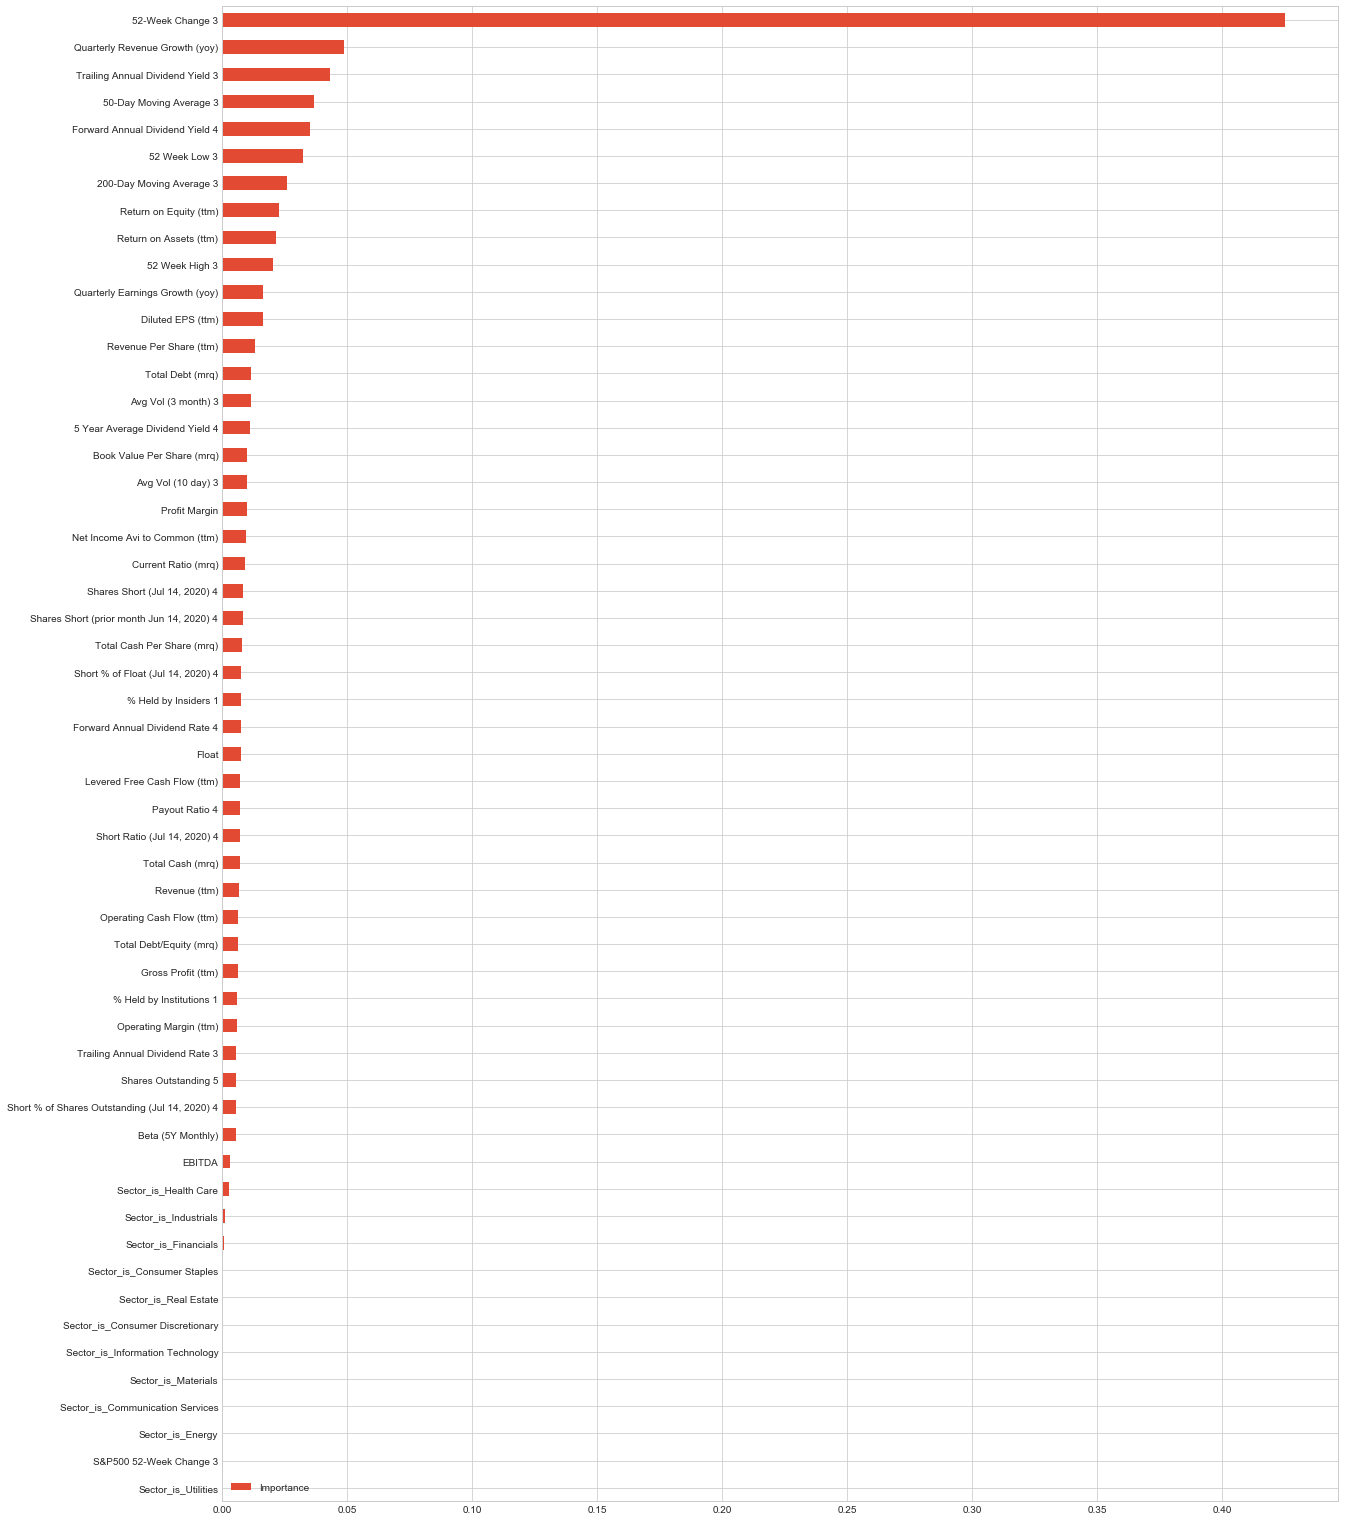

In [64]:
plt.style.use('seaborn-whitegrid')
Importances.plot(kind='barh', figsize=(20,len(importance)/2));

PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

We can use PCA to reduce the number of features to use in our ML algorithms, and graphing the variance gives us an idea of how many features we really need to represent our dataset fully.

In [103]:
X = df_model_input.drop(['Perform_Ind','Import_Date','Name','52-Week Change 3'],axis=1)
y = df_model_input['Perform_Ind']

In [104]:
std_X = preprocessing.StandardScaler().fit(X).transform(X)

In [105]:
fit1 = PCA(n_components=len(X.columns)).fit(std_X)

<BarContainer object of 55 artists>

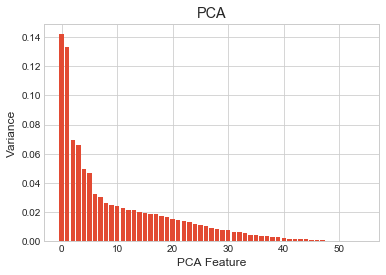

In [81]:
plt.style.use('seaborn-whitegrid')
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA')
plt.bar(range(0,fit1.explained_variance_ratio_.size),fit1.explained_variance_ratio_)

Recursive Feature Elimination

In [85]:
Selector = RFECV(LogisticRegression(), step=1, cv=5, n_jobs=-1)

In [86]:
Selector.fit(X.values,y.values)

RFECV(cv=5,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=-1, scoring=None, step=1, verbose=0)

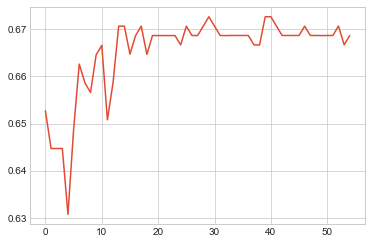

In [89]:
plt.plot(Selector.grid_scores_)

In [95]:
#ranking_ :The feature ranking, such that `ranking_[i]/corresponds to the ranking/position of the i-th feature./Selected (i.e., estimated best)/features are assigned rank 1.
pd.DataFrame(Selector.ranking_, index = X.columns, columns = ['Importance']).sort_values(by='Importance')

,Importance
Return on Equity (ttm),1
Gross Profit (ttm),1
EBITDA,1
Net Income Avi to Common (ttm),1
Diluted EPS (ttm),1
Payout Ratio 4,1
5 Year Average Dividend Yield 4,1
Total Cash (mrq),1
Trailing Annual Dividend Rate 3,1
Total Cash Per Share (mrq),1


# Split Train Test dataset 

In [106]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 42)

# Algorithms

In [ ]:

From here, we will be running the following algorithms.

KNN
Logistic Regression
Random Forest
Naive Bayes
Stochastic Gradient Decent
Linear SVC
Decision Tree
Gradient Boosted Trees

In [98]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [99]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

#logistic regression

In [119]:
#logistic regression
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)

In [120]:
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Accuracy: 72.85
Accuracy CV 10-Fold: 65.43


In [110]:
print(metrics.classification_report(y_train, train_pred_log))

              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76       230
         1.0       0.49      0.32      0.39       120

    accuracy                           0.65       350
   macro avg       0.60      0.57      0.57       350
weighted avg       0.63      0.65      0.63       350



In [111]:
print(metrics.classification_report(y_test, test_pred_log))

              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81        97
         1.0       0.70      0.43      0.53        54

    accuracy                           0.73       151
   macro avg       0.72      0.66      0.67       151
weighted avg       0.72      0.73      0.71       151



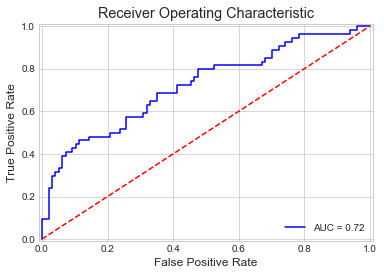

In [112]:
plot_roc_curve(y_test, probs_log)

In [ ]:
K-nearest Neighbours

In [117]:
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)

In [118]:
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Accuracy: 64.9
Accuracy CV 10-Fold: 63.43


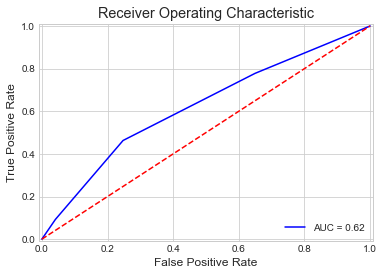

In [121]:

plot_roc_curve(y_test, probs_knn)

Gaussian Naive Bayes

In [123]:
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)

In [124]:
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)

Accuracy: 46.36
Accuracy CV 10-Fold: 47.43


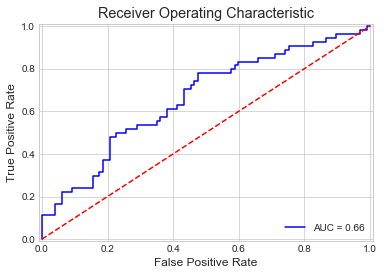

In [125]:
plot_roc_curve(y_test, probs_gau)

SVC

In [126]:
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, _ = fit_ml_algo(LinearSVC(),
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test, 
                                                                                           10)

In [127]:
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)

Accuracy: 68.87
Accuracy CV 10-Fold: 57.14


Stochastic Gradient Descent

In [128]:
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_algo(SGDClassifier(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)

In [129]:
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)

Accuracy: 75.5
Accuracy CV 10-Fold: 58.0


Decision Tree Classifier


In [130]:
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)

In [131]:
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Accuracy: 68.87
Accuracy CV 10-Fold: 70.86


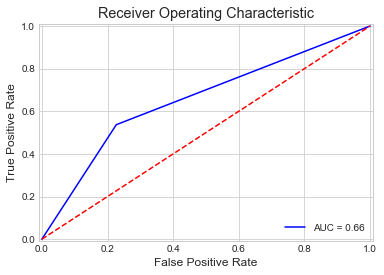

In [132]:
plot_roc_curve(y_test, probs_dt)